<a href="https://colab.research.google.com/github/mihakodric/Dinamika/blob/main/Vaja_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vaja 5: Kinetika sistema masnih točk

## Skupna masa sistema:  $m_{\text{s}}=\sum m_{i}$

## Masno središče:  $\mathbf{r}_{\text{T}} = x_{\text{T}}\mathbf{i}+y_{\text{T}}\mathbf{j}$
>#### $x$-smer: $\quad x_{\text{T}}=\frac{\sum x_{i} \cdot m_{i}}{m_{\text{s}}}$
>#### $y$-smer: $\quad y_{\text{T}}=\frac{\sum y_{i} \cdot m_{i}}{m_{\text{s}}}$

## Gibalna količina: $\mathbf{p}_{\text{s}}=\sum m_{i} \cdot \dot{\mathbf{r}}_{i} = m_{\text{s}}\cdot \dot{\mathbf{r}}_{\text{s}}$

>#### Sprememba gibalne količine
$\sum\mathbf{F}=m_{\text{s}}\cdot \ddot{\mathbf{r}}_{\text{T}}$

## Vrtilna količina: $\mathbf{L}=\sum \mathbf{r}_{i}\times m_{i}\dot{\mathbf{r}}_{i} = 
\mathbf{r}_{\text{T}}\times m_{\text{s}}\dot{\mathbf{r}}_{\text{T}}+\sum \mathbf{\rho}\times m_{i}\dot{\mathbf{\rho}}_{i} 
$

>#### Sprememba vrtilne količine
$\sum\mathbf{M}=\sum\mathbf{r}_{i}\mathbf{F}_{i}=\mathbf{r}_{\text{T}}\times m_{\text{s}}\ddot{\mathbf{r}}_{\text{T}}+\sum \mathbf{\rho}\times m_{i}\ddot{\mathbf{\rho}}_{i} $

## Energijske razmere
>#### Mehansko delo sile
$W_{12} = \sum W_{12, i}$

>#### Kinetična energija
$E_{\text{k}} = \sum \frac{m_{\text{i}}\cdot \dot{r}^2_{i}}{2} = \frac{m_{\text{s}}\cdot \dot{r}^2_{\text{T}}}{2} + 
\sum \frac{m_{\text{i}}\cdot \dot{\rho}^2_{i}}{2}$

>#### Potencialna energija
$E_{\text{p}} = \sum m_{\text{i}}\cdot g \cdot y_{i} = m_{\text{s}}\cdot g \cdot y_{\text{T}}$ 

# Naloga 1
Prizmi A in B sta zloženi, kot je prikazano na sliki. 
Zaradi sile teže se sistem prične premikati iz mirovanja. 
Določite premik prizme A v trenutku, ko prizma B zadane $x$ os. 
Trenje zanemarite.

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# predpostavimo podatke
a = 2
b = 1
m_A = 2
m_B = 1

x_A = 1 / (m_A + m_B) * (m_B*a - m_B*b)
x_A

0.3333333333333333

# Naloga 2
Biljardna krogla A potuje z začetno hitrostjo $v_0$. 
Po trku s kroglama B in C se vse dotaknejo stene, kot je prikazano na sliki. 
Določite hitrost krogel pri dotiku s steno. 
Trenje zanemarite ter privzemite idealno elastičen trk krogel.

In [35]:
v0 = 10

# pri reševanju dobimo sistem 4 nellinearnih enačb s štirimi neznankami 
# to lahko ročno rešimo z ispostavljanjem, v pythonu pa si lahko pomagamo 
# z numeričnim reševanjem s knjižnico scipy

from scipy.optimize import fsolve

def equations(p):
    vA, vBx, vBy, vC = p
    return vBx+vC-v0, vA-vBy, vA**2+vBx**2+vBy**2+vC**2-v0**2, 2*vA-1.5*vBy-1.2*vC+0.8*v0

vA, vBx, vBy, vC = fsolve(equations, (5, 5, 5, 5)) # vektor (5, 5, 5, 5) so začetni približki rešitev
print(vA, vBx, vBy, vC)

3.7997574710720663 1.7501010537199726 3.7997574710720663 8.249898946280029


# Naloga 3
Motor mešalca epruvet deluje na gred z momentom $M$. 
Izračunajte čas $t_1$, ki je potreben, da štiri epruvete mase $m$ zavrtimo do kotne hitrosti $\omega_1$. 
Kolikšen je kot zasuka mešalca $\varphi_1$, ki se je zgodil v tem času?

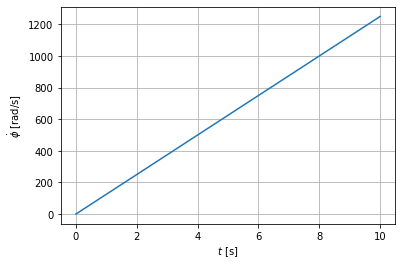

In [36]:
# predpostavimo podatke
r = 0.2
M = 1
m = 0.05
omega_1 = 10

# prepis kotne hitrosti v odvisnosti od časa:
def omega(t):
  return (M*t) / (4*r**2*m)

t = np.linspace(0, 10, 100)

plt.plot(t, omega(t))
plt.xlabel("$t$ [s]")
plt.ylabel("$\dot{\phi}$ [rad/s]")
plt.grid();

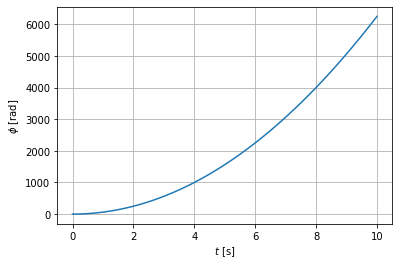

In [37]:
# prepis zasuka v odvisnosti od časa:
def phi(t):
  return (M*t**2/2) / (4*r**2*m)

t = np.linspace(0, 10, 100)

plt.plot(t, phi(t))
plt.xlabel("$t$ [s]")
plt.ylabel("$\phi$ [rad]")
plt.grid();